# Data cleaning and exploratory data analysis

## Background

The fake vs real news dataset has been downloaded from [Kaggle](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset). This data set includes data for 21,417 articles considered to be 'real' news and 23,481 articles considered to be fake news.

The stated task is: can you use this data set to make an algorithm able to determine if an article is fake news or not ?

## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats as stests
from collections import Counter

## Read in datasets

In [2]:
real_df = pd.read_csv('~/documents/Data/Fake vs Real News/real_raw.csv')
fake_df = pd.read_csv('~/documents/Data/Fake vs Real News/fake_raw.csv')

## Shape

In [3]:
print(real_df.shape)
print(fake_df.shape)

(21417, 4)
(23481, 4)


## Column names

In [4]:
print(real_df.columns, '\n')
print(fake_df.columns)

Index(['title', 'text', 'subject', 'date'], dtype='object') 

Index(['title', 'text', 'subject', 'date'], dtype='object')


## Data types

In [5]:
print(real_df.dtypes, '\n')
print(fake_df.dtypes)

title      object
text       object
subject    object
date       object
dtype: object 

title      object
text       object
subject    object
date       object
dtype: object


## Drop irrelevant columns

In [6]:
print(pd.unique(real_df['subject']))
print(pd.unique(fake_df['subject']))

['politicsNews' 'worldnews']
['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east']


There is no overlap of the subjects in the real dataset and those in the fake dataset. This means that you could create a model that correctly predicts real vs fake news in this data set with 100% accuracy. However, this is not a meaningful distinction, and the model would not generalise well to other datasets. Therefore, I choose to discard this column to reduce the dimensionality of the problem.

In [7]:
real_df = real_df.drop('subject', axis = 1)
fake_df = fake_df.drop('subject', axis = 1)

In [8]:
print(real_df.columns, '\n')
print(fake_df.columns)

Index(['title', 'text', 'date'], dtype='object') 

Index(['title', 'text', 'date'], dtype='object')


## Rename columns

No need to rename columns in this case. Their meaning is clear.

## Check for duplicate rows

In [9]:
print(real_df.duplicated().sum())
print(fake_df.duplicated().sum())

217
5571


## Drop duplicate rows

In [10]:
real_df = real_df.drop_duplicates()
fake_df = fake_df.drop_duplicates()

In [11]:
print(real_df.shape)
print(fake_df.shape)

(21200, 3)
(17910, 3)


## Check for null or NA values

In [12]:
print(real_df.isna().sum(), '\n')
print(fake_df.isna().sum(), '\n')

title    0
text     0
date     0
dtype: int64 

title    0
text     0
date     0
dtype: int64 



## Date column

Convert date column to datetime object.

In [13]:
real_df['date'] = pd.to_datetime(real_df['date'], errors = 'coerce')
fake_df['date'] = pd.to_datetime(fake_df['date'], errors = 'coerce')

Number of rows for which the conversion failed, i.e. with invalid datetime objects in the date column.

In [14]:
print(sum(real_df['date'].isnull()))
print(sum(fake_df['date'].isnull()))

0
6


This is a trivial number compared to the total number of rows, so it is OK to drop these rows.

In [15]:
fake_df = fake_df[fake_df['date'].notnull()]

In [16]:
print(real_df.dtypes, '\n')
print(fake_df.dtypes)

title            object
text             object
date     datetime64[ns]
dtype: object 

title            object
text             object
date     datetime64[ns]
dtype: object


Earliest and latest dates.

In [17]:
print(real_df['date'].min())
print(real_df['date'].max(), '\n')
print(fake_df['date'].min())
print(fake_df['date'].max())

2016-01-13 00:00:00
2017-12-31 00:00:00 

2015-03-31 00:00:00
2018-02-19 00:00:00


In [18]:
def plot_comparison_histogram(real_df, fake_df, variable_to_plot, title, xlabel, bins = None, xlim = None):
    fig, ax = plt.subplots()
    sns.distplot(real_df[variable_to_plot], bins = bins, kde = False)
    sns.distplot(fake_df[variable_to_plot], bins = bins, kde = False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    ax.legend(['Real news', 'Fake news'])
    plt.xlim(left = None, right = xlim)
    plt.show()

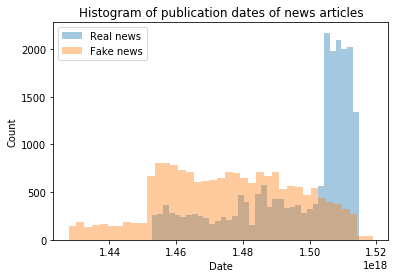

In [19]:
plot_comparison_histogram(real_df, fake_df, 'date',
                          title = 'Histogram of publication dates of news articles',
                         xlabel = 'Date')

It appears there are structural differences between the real news data and the fake news data that do not appear to be meaningfully linked to the verisimilitude of the news articles, and would likely just obscure any genuine features. Therefore, I believe it would make sense to remove this column to reduce the dimensionality of the problem and avoid overfitting.

In [20]:
real_df = real_df.drop('date', axis = 1)
fake_df = fake_df.drop('date', axis = 1)

In [21]:
print(real_df.columns, '\n')
print(fake_df.columns)

Index(['title', 'text'], dtype='object') 

Index(['title', 'text'], dtype='object')


### Save clean data to file

In [23]:
real_df.to_csv('~/documents/Data/Fake vs Real News/real_clean.csv')
fake_df.to_csv('~/documents/Data/Fake vs Real News/fake_clean.csv')